# The very confusing Confusion Matrix

Hi! If you are super confused by the "confusion matrix" in machine learning, you're not alone! What we are going to do is hit the reset button, start over with useful trip to the past, and actually understand this silly little 2x2 matrix!

## The Response Matrix

Let's imagine that you are trying to prove to some website that you are not a robot. You know what I'm talking about. Sometimes you get lucky and just have to check a box. Unfortunately, sometimes you get a bunch of images and you have to pick the ones with chimneys in them or something.

Like this:  
![failed to load](images/chimneys.jpeg "chimneys test")

Let's think about what you have to do... You have to  
1) PICK all of the images that DO have a chimney, and  
2) NOT PICK any of the images that DON'T have a chimney.
  
Let's think about your possible answers, whether they will by correct or incorrect and, *in what way will they be correct or incorrect*. 

If the last bit of that sentence (technically, the final clause, since we're all LAMbs here) doesn't make sense to you, just hang on! 

Let's consider the possible responses you might make, in light of whether there was actually a chimney in the  image. You can say:  
    - "yes, there *is* a chimney", and there actually is – let's call this a "hit"  
    - "no, there *isn't* a chimney", and there actually is none - call this a "correct rejection"  
    - "yes, there *is* a chimney", but there isn't – you got fooled by a tower or something – we'll call this a "false alarm"  
    - "no, there *isn't* a chimney", but in fact there is – call this a "miss"!  

Let's think about this. We have 2 possible states of the world for each image (chimney or no chimney), and 2 possible responses from you ("yes, chimney" or "nope, no chimney". We can represent this as a 2x2 matrix like so:

Like this:  
![failed to load](images/resp_matrix.jpg "response matrix")

So, if you think about this for a minute, hopefully you can see that all the responses for a challenge like this can be sorted into this matrix, and the way they sort will tell you how good the person is from telling apart images with a chimney from those without.  
For the reCaptcha image above, I might say that the 3 images in the leftmost row all have chimneys, as does the top-right one. I'd say all the other 5 do not. So my response matrix would look like this:

|             | Present | Absent |
|-------------|-------------------|------------------|
|"Chimney"    | 4                 | 0                |
|"No Chimney" | 0                 | 5                |

In this case, all 9 of my responses sort into cells on the "correct" diagonal, and no responses went into cells on the "wrong" diagonal. So I'm human after all!

---

Note that solving problems such as this is a *major* area of interest in AI and machine learning. One of the things we hope computers or robots can do for us is to spot stuff (anything from ripe cherries to enemy missiles) better than we can (robots don't get tired after all). Just like with Chess and Go, machines will probably get as good or better at these kinds of tasks then we are. Right now, however, this is an interesting problem because it's one that we do well using our own eyes, but not quite as well when we try to make a machine to do it!  
  *This is why you will run into "response" matrixes a lot in machine learning. they  just go by another name; they're called **confusion matrixes**!*

---



A child, a person from a place with no chimneys, or a machine learning algorithm might not do so well! A little kid could mistake the traffic light for a chimney in the middle image, and mistakenly think that the thing in the upper left image was a tower of some sort.  
In this case, their response matrix would look like this:

|             | Present | Absent |
|-------------|-------------------|------------------|
|"Chimney"    | 3                 | 1                |
|"No Chimney" | 1                 | 4                |

This clearly represents worse performance than in the prior case, because instead of having all 9 responses on the "correct" diagonal, we now have just 7, and we have 2 responses on the "incorrect" diagonal. But can we summarize the performance with a number? Yes, we can! In fact, we can come up with several different summaries, depending on what we want to emphasize. For example, we could compute the overall performance by looking at the ratio of **correct** responses to **all** responses, and we could call it "accuracy":  
  
``` accuracy = (hits + correct_rejections)/total_responses ```  

In the first case, that's just 9/9 or 1.0 (go me!). In the second case, we have 7/9 which is... hang on, let me get my calculator... about 0.78 – this represents the decreases accuracy from making 2 mistakes, one a false alarm (FA) and one a miss.

---

Before we delve any deeper, let's paint a little statistical picture of what's going on in your head, or in the workings of a machine learning algorithm when doing this object identification task. You look at each image and have to decide whether there is a chimney or not. If the image is "chimneyish" enough, you say "yes, there's a chimney." Otherwise, you say "no, no chimney." So there is some part of your brain that is analyzing the *evidence* or *signal strength* for a chimney, and deciding whether the evidence is strong enough – whether there is enough *signal* to say "chimney".

So, on each trial, we could graph how much *signal* there was like this:

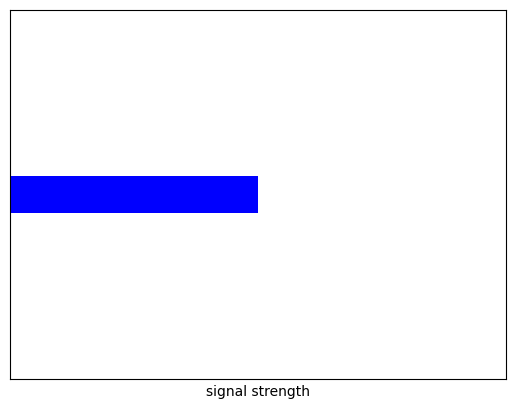

In [9]:
# Data for the bar graph
signal_strength = [0.5]  # Single bar with a value of 1

# Create the bar graph
fig, ax = plt.subplots()
ax.barh([0], signal_strength, color='blue', height=0.1)  # Horizontal bar with reduced height


# Customize the axes
ax.set_yticks([])  # Remove y-axis tick labels
ax.set_xlabel("signal strength")  # Label for x-axis
ax.set_xticks([])  # Remove x-axis tick labels
ax.set_xlim(0, 1)  # Set x-axis limits
ax.set_ylim(-0.5, 0.5)  # Set y-axis limits

# Display the plot
plt.show()

So, what do you say? Is that a chimney or not? Is there enough signal? How do you decide?  
To give your decision some context, let's look at several trials, some containing a chimney, and some not:

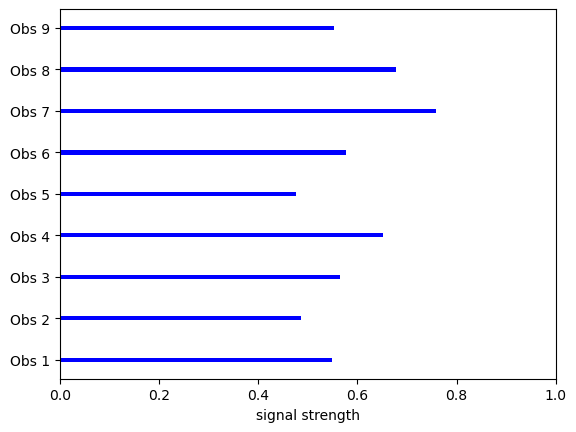

In [17]:
import numpy as np

import matplotlib.pyplot as plt

std_signal_plus_noise = 0.1
std_noise = 0.1
mean_signal_plus_noise = 0.6
mean_noise = 0.5

# Generate random samples
np.random.seed(42)  # For reproducibility
noise = np.random.normal(mean_noise, std_noise, 5)  # 5 samples from noise distribution
signal_plus_noise = np.random.normal(mean_signal_plus_noise,std_signal_plus_noise, 4)  # 4 samples from signal + noise distribution

# Combine the samples
observations = np.concatenate([noise, signal_plus_noise])

# Create the bar graph
fig, ax = plt.subplots()
ax.barh(range(len(observations)), observations, color='blue', height=0.1)

# Customize the axes
ax.set_yticks(range(len(observations)))
ax.set_yticklabels([f"Obs {i+1}" for i in range(len(observations))])
ax.set_xlabel("signal strength")
ax.set_xlim(0, 1)

# Display the plot
plt.show()

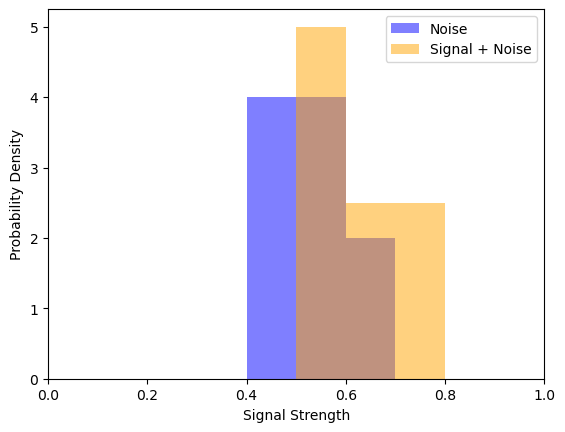

In [16]:
# Plot the probability distributions
fig, ax = plt.subplots()

# Set the x-axis limits
ax.hist(noise, bins=10, density=True, alpha=0.5, label='Noise', color='blue', range=(0, 1))
ax.hist(signal_plus_noise, bins=10, density=True, alpha=0.5, label='Signal + Noise', color='orange', range=(0, 1))
ax.set_xlim(0, 1)

# Add labels and legend
ax.set_xlabel('Signal Strength')
ax.set_ylabel('Probability Density')
ax.legend()

# Display the plot
plt.show()

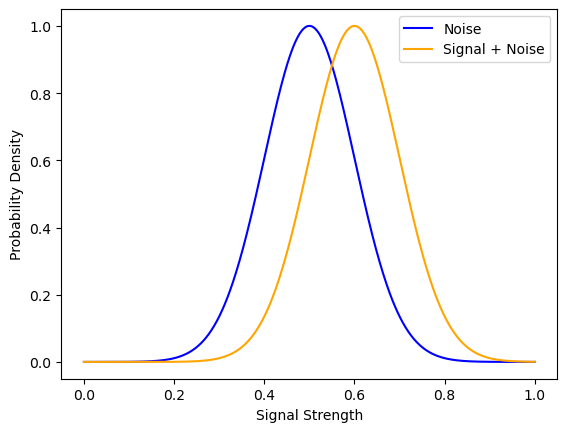

In [18]:
from scipy.stats import norm
import numpy as np

# Define the x-axis range and normalize the distributions
x = np.linspace(0, 1, 500)
pdf_noise = norm.pdf(x, mean_noise, std_noise)
pdf_signal_plus_noise = norm.pdf(x, mean_signal_plus_noise, std_signal_plus_noise)

# Normalize the PDFs to a height of 1
pdf_noise /= pdf_noise.max()
pdf_signal_plus_noise /= pdf_signal_plus_noise.max()
x = np.linspace(0, 1, 500)

# Plot the smooth distributions
fig, ax = plt.subplots()
ax.plot(x, pdf_noise, label='Noise', color='blue')
ax.plot(x, pdf_signal_plus_noise, label='Signal + Noise', color='orange')

# Add labels, legend, and title
ax.set_xlabel('Signal Strength')
ax.set_ylabel('Probability Density')
ax.legend()

# Display the plot
plt.show()

In [ ]:
# Calculate the midpoint signal strength
midpoint_signal_strength = (mean_noise + mean_signal_plus_noise) / 2

# Plot the smooth distributions
fig, ax = plt.subplots()
ax.plot(x, pdf_noise, label='Noise', color='blue')
ax.plot(x, pdf_signal_plus_noise, label='Signal + Noise', color='orange')

# Add a vertical line at the midpoint signal strength
ax.axvline(midpoint_signal_strength, color='red', linestyle='--', label=f'Midpoint ({midpoint_signal_strength:.2f})')

# Add labels, legend, and title
ax.set_xlabel('Signal Strength')
ax.set_ylabel('Probability Density')
ax.legend()

# Display the plot
plt.show()